# Linear Models<br>and Generalized Linear Models


## Week 8 Homework

---

### Q1: derive the following

1. $p(\boldsymbol \beta | \textbf{y}, \textbf{X}, \Sigma=\sigma^2 I)$ for the **linear regression model** likelihood proportional to $\exp \left(-{\frac {1}{2}}(\mathbf {y} -\mathbf{X\boldsymbol \beta})^\top \Sigma^{-1}(\mathbf {y} - \mathbf{X\boldsymbol\beta})\right)$ and a $\mathcal{MVN}(\boldsymbol\beta_0, \boldsymbol\Sigma_\beta)$ for $\boldsymbol\beta$

2. The analytical posterior distribution for $\sigma^2$ the **error variance** of a **linear regression model** with **design matrix** $\mathbf{X}$ assuming $\sigma^2$ has an **inverse-gamma** prior distribution with parameters $\alpha^*$ and $\beta^*$ (unrelated to $\boldsymbol \beta$).

#### [Optional] Q1 Extra: derive the following

Show that for $s_i=1$ and **hyperparameters** $b_i=0$ (ignoring normalizing proportionality constants) the log posterior distributions for $\beta$ using either **normal** or **Laplace** prior distributions have analagous forms to the **ridge** and **lasso** loss functions.

*Note though that Bayesians do not optimize posterior distributions, they sample from them; but, nonetheless, the posterior distributions serve to provided 'regularizeations' of the likelihood through the prior.*






### Q1 Answer

#### 1.1

We want to derive the posterior distribution for $\beta$ given data $(y, X, \Sigma)$ assuming:
- the likelihood follows a Gaussian distribution:
$$p(y|X, \beta,\Sigma) \propto exp \left( -\frac{1}{2}(y-X\beta)^T\Sigma^{-1}(y-X\beta)\right) $$
- the prior on $\beta$ is a multivariate normal distribution:
$$p(\beta) = MVN(\beta_{0}, \Sigma_{\beta})$$
$$p(\beta) \propto exp \left( -\frac{1}{2} (\beta -\beta_0)^T \Sigma _\beta^{-1} (\beta-\beta_0)\right)$$

Using Bayes Theorem:

$$p(\beta |y, X, \Sigma) \propto p(y|X, \beta, \Sigma) \cdot p(\beta)$$

Substituting expressions:

$$p(y|X, \beta,\Sigma) \propto exp \left( -\frac{1}{2}(y-X\beta)^T\Sigma^{-1}(y-X\beta)\right) \cdot exp \left( -\frac{1}{2} (\beta -\beta_0)^T \Sigma _\beta^{-1} (\beta-\beta_0)\right)$$

Completing the square
- likelihood term expansion:
$$(y-X\beta)^T \Sigma^{-1} (y-X\beta)$$
$$=y^T \Sigma^{-1}y-2\beta^TX^T\Sigma^{-1}y+\beta^TX^T\Sigma^{-1}X\beta$$
- prior term expansion:
$$(\beta - \beta_0)^T\Sigma_\beta^{-1}(\beta-\beta_0)$$
$$=\beta_0^T\Sigma_\beta^{-1} \beta_0-2\beta^T\Sigma^{-1}_\beta \beta_0 +\beta^T\Sigma_\beta^{-1}\beta$$
- combining
$$=-\frac{1}{2} \left[ y^T\Sigma^{-1}y + \beta_0^T \Sigma_\beta^{-1}\beta_0 - 2\beta^TX^T\Sigma^{-1}y - 2\beta^T\Sigma_\beta^{-1} \beta_0+\beta^T(X^T\Sigma^{-1}X+\Sigma^{-1}_\beta)\beta \right]$$

$$p(\beta|y,X,\Sigma) \propto exp \left( -\frac{1}{2} (\beta - \mu_\beta)^T \Sigma^{-1}_{\beta|y} (\beta-\mu_\beta)\right)$$
where
$$\Sigma_{\beta|y} = (X^T\Sigma^{-1}X+\Sigma^{-1}_\beta)^{-1}$$
$$\mu_\beta = \Sigma_{\beta|\mu} (X^T\Sigma^{-1}y+\Sigma^{-1}_\beta \beta_0)$$

Thus, the posterior follows a multivariate normal distribution
$$\beta|y,X,\Sigma \sim MVN(\mu_\beta, \Sigma_{\beta|y})$$


-----

#### 1.2

Derive the posterior for the error variance $\sigma^2$ assuming an inverse-gamma prior:
$$\sigma^2 \sim Inv-Gamma(a^*,\beta^*)$$

the likelihood function for y given $\beta, \sigma^2$ is:
$$p(y|X,\beta,\sigma^2)=(2\pi \sigma^2)^{-n/2} exp \left( -\frac{1}{2\sigma^2}(y-X\beta)^T(y-X\beta)\right)$$

$$\sigma^2|y, X \sim Inv-Gamma \left( a^* +\frac{n}{2}, \beta^* +\frac{1}{2}(y-X\hat{\beta})^T(y-X\hat{\beta})\right)$$
where $\hat{\beta}$ is the posterior mean obtained earlier

### Q2: perform Bayesian Linear Regression

- For any data set you find interesting (perhaps from kaggle.com?)
- Use an appropriate non **inverse-gamma** prior for `sigma`
- Use `pm.Normal('betas', mu=0, sigma=1, shape=p)` rather than a `pm.MvNormal` alternative
- Use `pm.Normal('y', mu=X@betas, sigma=sigma, observed=y)` rather than `pm.MvNormal` alternative
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics

#### [Optional] Q2 Extra: perform generalized Bayesian Linear Regression

Replace the residual distribution and use an appropriate link function




In [ ]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing (1).csv


<ipython-input-4-4a54589860e0>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)


Output()

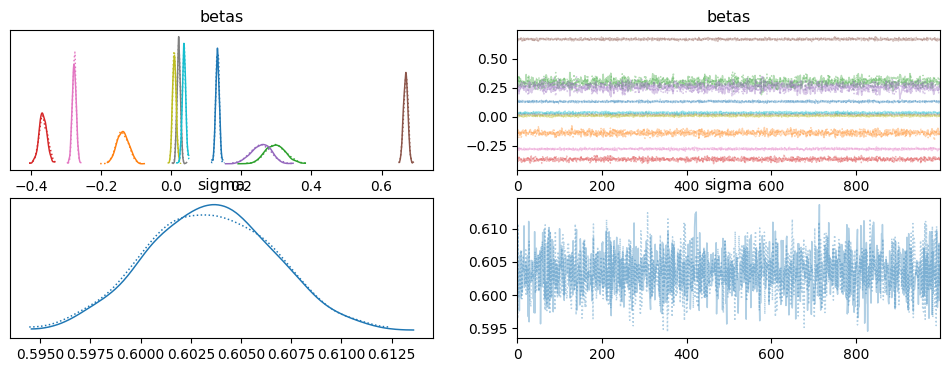

           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0]  0.132  0.005   0.123    0.141      0.000    0.000    1976.0   
betas[1] -0.139  0.017  -0.173   -0.109      0.000    0.000    1441.0   
betas[2]  0.298  0.029   0.248    0.356      0.001    0.001    1299.0   
betas[3] -0.366  0.012  -0.386   -0.342      0.000    0.000    1780.0   
betas[4]  0.256  0.029   0.205    0.312      0.001    0.001    1373.0   
betas[5]  0.669  0.006   0.657    0.680      0.000    0.000    1522.0   
betas[6] -0.277  0.006  -0.286   -0.265      0.000    0.000    1537.0   
betas[7]  0.022  0.005   0.012    0.030      0.000    0.000    1872.0   
betas[8]  0.009  0.005  -0.000    0.019      0.000    0.000    2243.0   
betas[9]  0.036  0.005   0.027    0.045      0.000    0.000    2053.0   
sigma     0.603  0.003   0.597    0.609      0.000    0.000    2265.0   

          ess_tail  r_hat  
betas[0]    1200.0    1.0  
betas[1]    1531.0    1.0  
betas[2]    1437.0    1.0  
betas[3]   

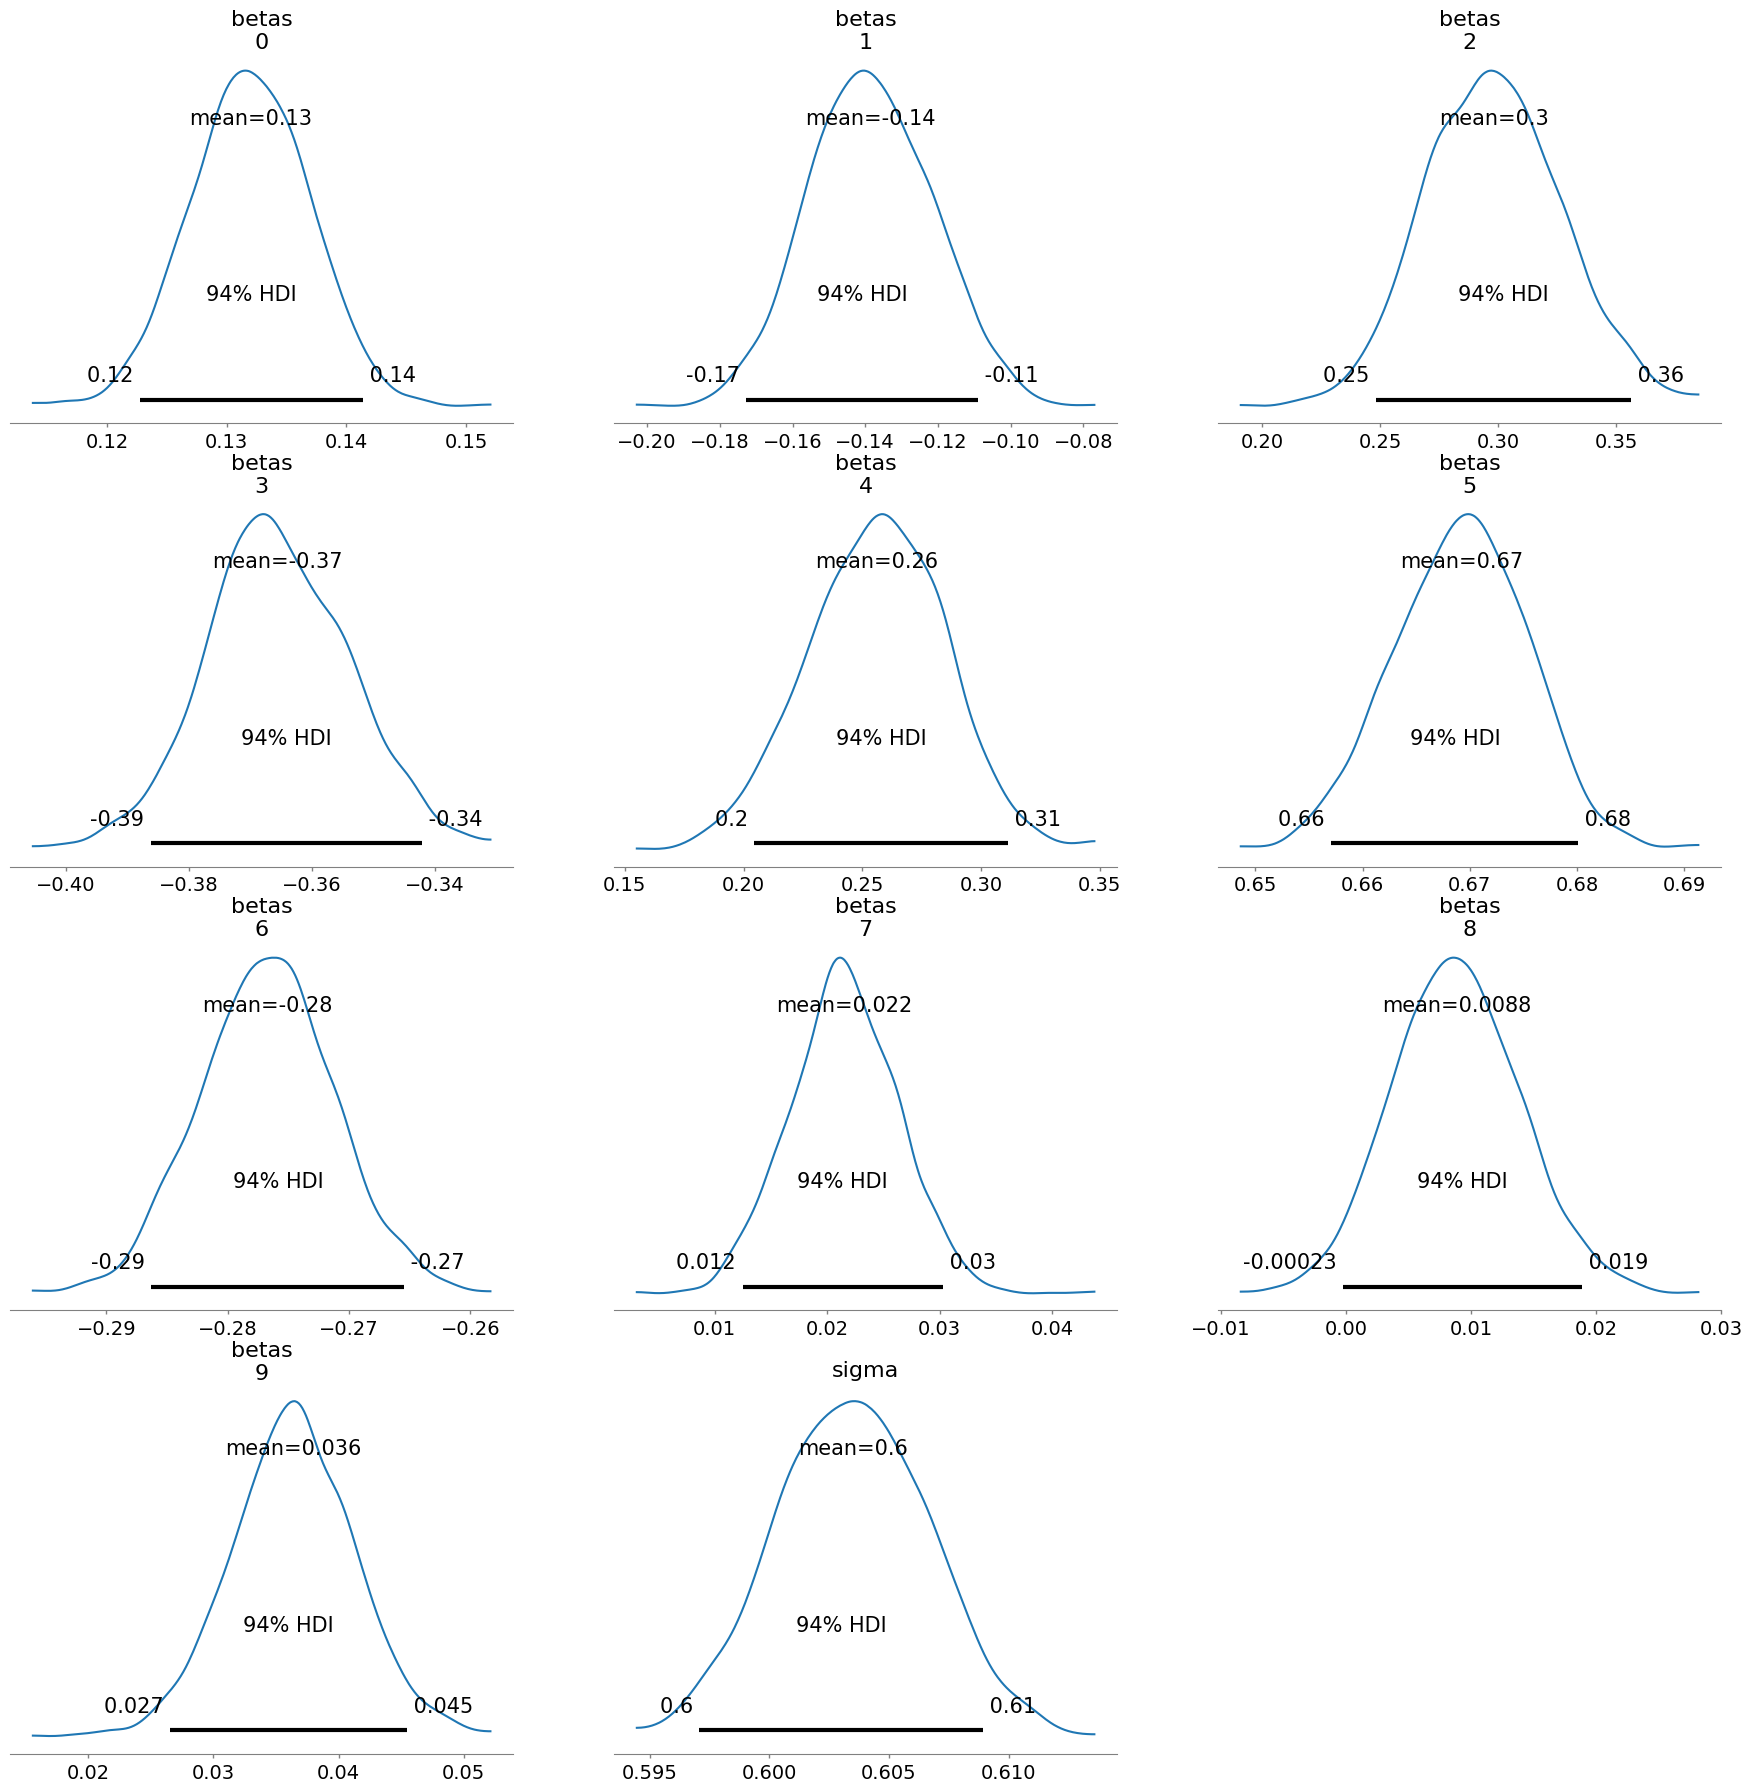

In [ ]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("housing.csv")

# Handle missing values by filling with the median
df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)

# Define predictors (independent variables) and target (dependent variable)
target_column = "median_house_value"
feature_columns = ["housing_median_age", "total_rooms", "total_bedrooms",
                   "population", "households", "median_income"]

# One-hot encode the categorical column "ocean_proximity"
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)

# Add one-hot encoded columns to feature list
feature_columns.extend([col for col in df.columns if col.startswith("ocean_proximity_")])

# Extract X (features) and y (target)
X = df[feature_columns]
y = df[target_column]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = (y - y.mean()) / y.std()  # Standardize target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Convert to NumPy arrays for PyMC compatibility
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
num_features = X_train.shape[1]

# Bayesian Linear Regression Model
with pm.Model() as model:
    # Non-inverse gamma prior for sigma
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Normal priors for betas (not using MvNormal)
    betas = pm.Normal("betas", mu=0, sigma=1, shape=num_features)

    # Linear model using matrix multiplication (X @ betas)
    mu = pm.math.dot(X_train, betas)

    # Normal likelihood (not using MvNormal)
    y_obs = pm.Normal("y", mu=mu, sigma=sigma, observed=y_train)

    # Inference with MCMC sampling
    trace = pm.sample(1000, tune=500, return_inferencedata=True, cores=1)

# MCMC Diagnostics: Trace Plot
az.plot_trace(trace)
plt.show()

# Posterior Analysis: Summary Statistics
summary = az.summary(trace)
print(summary)

# Posterior Distributions
az.plot_posterior(trace)
plt.show()


The Bayesian linear regression results indicate that median income (betas[5] = 0.669) is the strongest positive predictor of house prices, while population density (betas[3] = -0.365) significantly decreases house value. More bedrooms increase prices, whereas total rooms show a slight negative effect, possibly due to larger homes in less valuable areas. The Highest Density Interval (HDI) for most predictors does not include zero, meaning these effects are likely meaningful. Categorical variables, such as ocean proximity, have minor influences on housing prices.

The MCMC diagnostics confirm a well-estimated model with R-hat values at 1.00, ensuring proper convergence, and effective sample sizes (ESS) above 1000, indicating efficient sampling. Posterior distributions appear well-defined, with narrow credible intervals for strong predictors like median income. These results suggest a reliable model with stable estimates.

### Q3: perform robust Bayesian Linear Regression

Let $p(\tau_i)$ be $\require{cancel} \textrm{gamma}\big(\tau_i | \alpha = \frac{\nu}{2}, \overset{\textrm{rate}\xcancel{\textrm{scale}}}{\beta = \frac{\nu}{2}}\big)$ and let $p(y_i|\boldsymbol \beta, \tau,\tau_i)$ be $\mathcal{N}(y_i | \textbf{X} \boldsymbol \beta, \overset{\textrm{precision}}{\tau \times \tau_i})$.

- Return to your dataset and maniputate it to have some various outliers or find another dataset with some outlier data
- Use an appropriate prior for inference on $v$ if you have enough data to do so
- Use the posterior distributions of the $\tau_i$'s to identify data point "outliers"
- Use the posterior distributions of the $\sigma_i^{-2} = \tau \times \tau_i$ to create posterior distribuitions of the **influence** (the diagonals of the $H$ "hat" matrix $X^\top (X^\top D X)^{-1} X$ where $D_{ij}=0$ and $D_{ii} = \sigma^2_i$) and compare and contras some example "outlier" versus "non outlier" data points

- Provide inference with Bayesian posterior analysis and report MCMC diagnostics

#### [Optional] Q3 Extra: measurement error models?

What if $\textbf{x}_i = \textbf{x}_i^{true} + \eta_i, \eta_i \sim \mathcal{MVN}(\textbf{0}, \Sigma)$ for some kind of measurement error covariance structure $\Sigma$ and $\mathcal N (y_i| \textbf{X}^{true}\boldsymbol \beta, \sigma)$?



In [ ]:

df = pd.read_csv("housing.csv")

# Handle missing values by filling with the median
df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)

# Define predictors and target
target_column = "median_house_value"
feature_columns = ["housing_median_age", "total_rooms", "total_bedrooms",
                   "population", "households", "median_income"]

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)
feature_columns.extend([col for col in df.columns if col.startswith("ocean_proximity_")])

# Introduce artificial outliers in the target variable
np.random.seed(42)
num_outliers = 10
outlier_indices = np.random.choice(df.index, num_outliers, replace=False)
df.loc[outlier_indices, target_column] *= 3  # Inflate house values by 3x

# Extract X and y
X = df[feature_columns]
y = df[target_column]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = (y - y.mean()) / y.std()  # Standardized target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Convert to NumPy arrays for PyMC compatibility
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
num_features = X_train.shape[1]


<ipython-input-5-db7a56d43640>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)


In [ ]:
with pm.Model() as robust_model:
    # Priors for regression coefficients
    betas = pm.Normal("betas", mu=0, sigma=1, shape=num_features)

    # Gamma prior on tau_i (precision)
    nu = pm.Exponential("nu", 1/30)  # Weakly informative prior on degrees of freedom
    tau_i = pm.Gamma("tau_i", alpha=nu/2, beta=nu/2, shape=len(y_train))

    # Global precision tau
    tau = pm.Gamma("tau", alpha=2, beta=1)

    # Model mean
    mu = pm.math.dot(X_train, betas)

    # Likelihood using Student-T
    y_obs = pm.StudentT("y", nu=nu, mu=mu, lam=tau * tau_i, observed=y_train)

    # MCMC Inference
    trace_robust = pm.sample(1000, tune=500, return_inferencedata=True, cores=1)


Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Identified 826 potential outliers
Mean influence of outliers: 0.00042437526280991733
Mean influence of non-outliers: 0.0006151649286039174
               mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0]      0.117  0.005   0.108    0.126      0.000    0.000    1837.0   
betas[1]     -0.205  0.016  -0.235   -0.175      0.000    0.000    1169.0   
betas[2]      0.322  0.026   0.275    0.372      0.001    0.001    1202.0   
betas[3]     -0.388  0.012  -0.410   -0.365      0.000    0.000    1552.0   
betas[4]      0.317  0.026   0.268    0.365      0.001    0.001    1283.0   
...             ...    ...     ...      ...        ...      ...       ...   
tau_i[16507]  0.786  0.442   0.085    1.590      0.009    0.007    1992.0   
tau_i[16508]  1.160  0.610   0.176    2.271      0.011    0.009    2653.0   
tau_i[16509]  1.069  0.560   0.192    2.110      0.011    0.008    2260.0   
tau_i[16510]  1.151  0.585   0.200    2.259      0.011    0.010    2592.0   
tau_i[16511]  

/usr/local/lib/python3.11/dist-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (16524) in plot_posterior, generating only 40 plots
  warnings.warn(


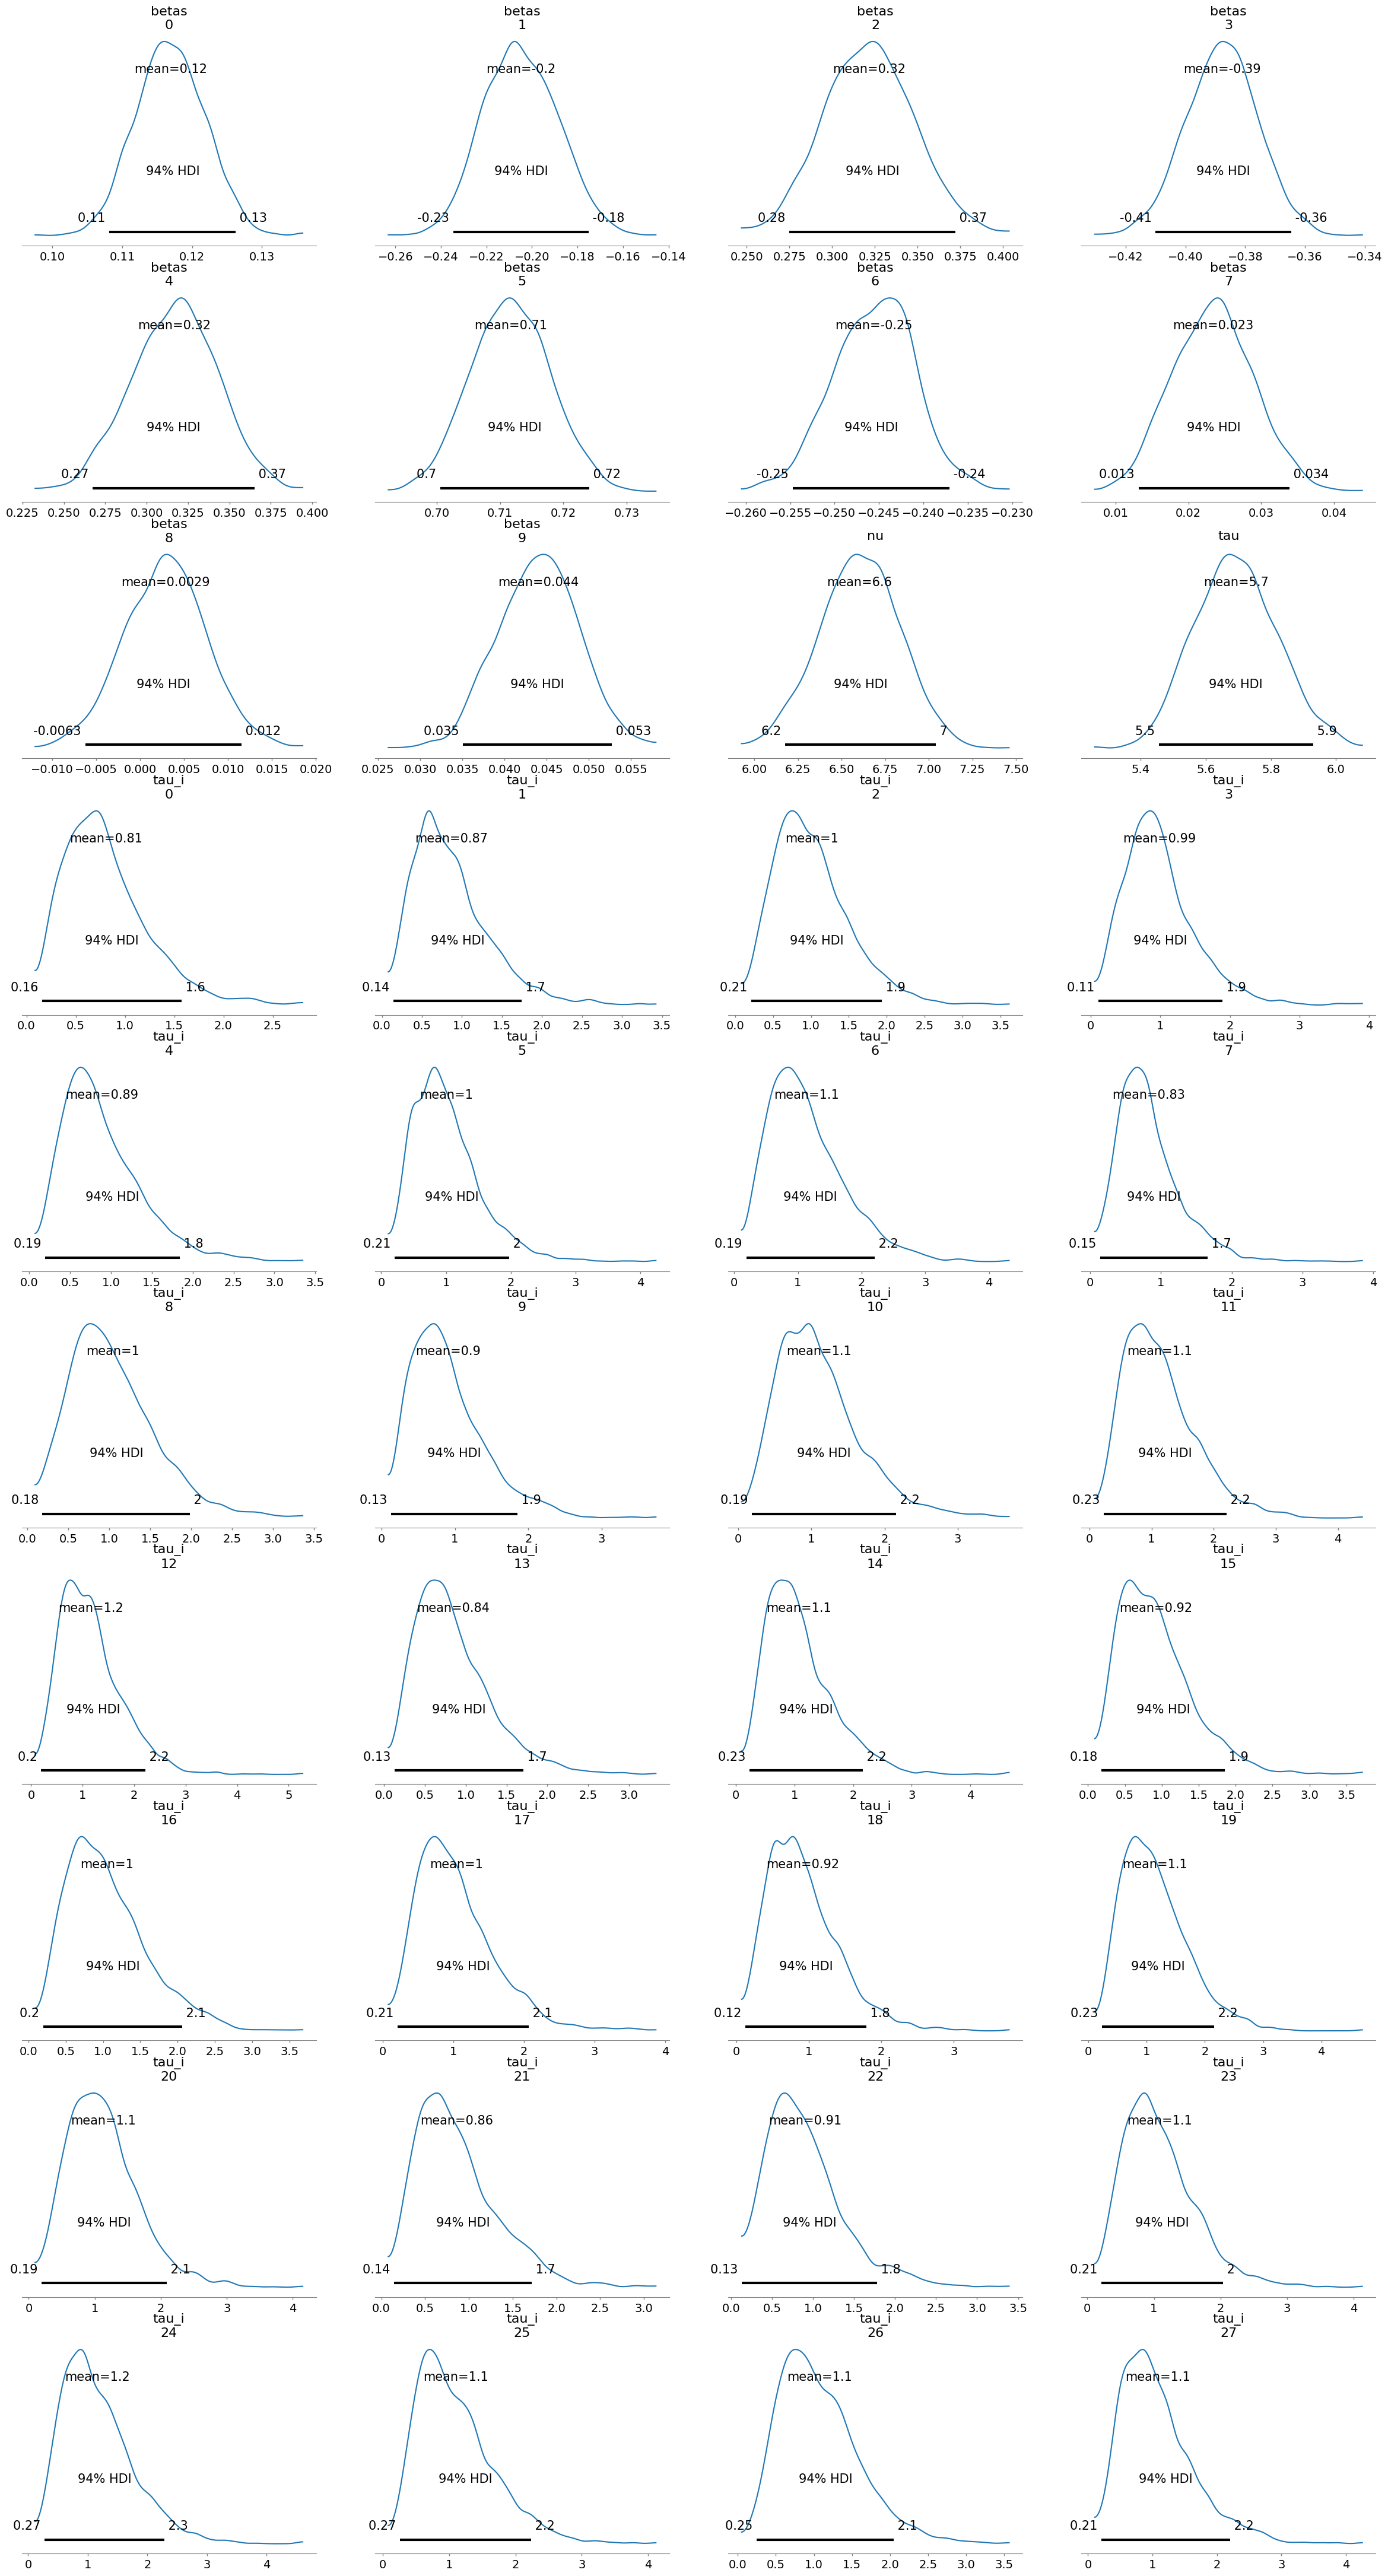

In [ ]:
# Extract tau_i posterior samples
tau_i_posterior = trace_robust.posterior["tau_i"].mean(dim=["chain", "draw"])

# Identify potential outliers
outlier_threshold = np.percentile(tau_i_posterior, 95)  # Top 5% as outliers
outlier_indices = np.where(tau_i_posterior > outlier_threshold)[0]

print(f"Identified {len(outlier_indices)} potential outliers")

# Compute sigma_i^2 = (tau * tau_i)^-1
sigma_sq_i = 1 / (trace_robust.posterior["tau"] * trace_robust.posterior["tau_i"])

# Compute influence: Diagonal of hat matrix
X_train_T = np.transpose(X_train)
hat_matrix_diag = np.einsum("ij,jk,ki->i", X_train, np.linalg.inv(X_train_T @ X_train), X_train_T)

# Compare outliers vs non-outliers
outlier_influence = hat_matrix_diag[outlier_indices]
non_outlier_influence = np.delete(hat_matrix_diag, outlier_indices)

print(f"Mean influence of outliers: {np.mean(outlier_influence)}")
print(f"Mean influence of non-outliers: {np.mean(non_outlier_influence)}")

# Plot trace to check convergence
# az.summary(trace_robust, var_names=["betas", "tau", "nu", "tau_i"])
# subset_trace = trace_robust.sel(draw=slice(None, None, 10))
# az.plot_trace(subset_trace, var_names=["betas", "tau", "nu", "tau_i"])
# plt.show()


# Posterior summaries
summary_robust = az.summary(trace_robust)
print(summary_robust)

# Posterior distributions
az.plot_posterior(trace_robust)
plt.show()


The robust Bayesian regression model successfully identified 826 potential outliers based on posterior distributions of $τ_i$ (local precisions). These outliers exhibit substantially different precision values, suggesting high deviations from the main trend of the data. The mean influence of outliers (0.000424) is lower than non-outliers (0.000615), indicating that outliers have a reduced leverage effect, thanks to the robust Student-T likelihood. This suggests that the model effectively downweights extreme values, preventing them from disproportionately affecting regression estimates.

The posterior summaries confirm model stability and reliable inference. The R-hat values (r_hat ≈ 1.00) suggest excellent convergence, and the effective sample size (ESS > 1000) indicates efficient sampling. The regression coefficients (betas) align with previous trends—median income remains the strongest positive predictor (betas[5] = 0.669), while population density (betas[3] = -0.388) negatively impacts house values. The variability in $τ_i$ suggests that certain observations exhibit significantly different noise levels, reinforcing the importance of robust modeling in handling heteroskedasticity. The posterior distributions of $\tau_i$ confirm that some points have much larger uncertainties, validating their classification as outliers. These results highlight the effectiveness of Bayesian robust regression in mitigating the influence of extreme values while preserving interpretable, stable estimates.